# 1.환경설정

In [5]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# data dir
import os
data_dir = '/content/drive/MyDrive/data'
os.listdir(data_dir)

['.ipynb_checkpoints',
 'Mypass.py',
 '__pycache__',
 'My_setting.py',
 'test.txt',
 'example.py',
 'My_setting.txt']

## 한글폰트 설치

In [1]:
#한글폰트 설치 :
import matplotlib as mpl
import matplotlib.pyplot as plt

!wget https://github.com/hwanheo97/Dataset/raw/master/NanumGothic.ttf

mpl.font_manager.fontManager.addfont('NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

--2023-07-22 03:46:10--  https://github.com/hwanheo97/Dataset/raw/master/NanumGothic.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hwanheo97/Dataset/master/NanumGothic.ttf [following]
--2023-07-22 03:46:11--  https://raw.githubusercontent.com/hwanheo97/Dataset/master/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343844 (4.1M) [application/octet-stream]
Saving to: ‘NanumGothic.ttf’

NanumGothic.ttf     100%[===================>]   4.14M  --.-KB/s    in 0.05s   

2023-07-22 03:46:11 (76.6 MB/s) - ‘NanumGothic.ttf’ saved [4343844/4343844]



###배경그림 및 글체 준비하기

In [2]:
!wget https://github.com/hwanheo97/Dataset/raw/master/heart.png
!wget https://github.com/hwanheo97/Dataset/raw/master/NanumMyeongjo.ttf
!wget https://github.com/hwanheo97/Dataset/raw/master/usa_map.jpg

--2023-07-22 03:46:25--  https://github.com/hwanheo97/Dataset/raw/master/heart.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hwanheo97/Dataset/master/heart.png [following]
--2023-07-22 03:46:25--  https://raw.githubusercontent.com/hwanheo97/Dataset/master/heart.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33907 (33K) [image/png]
Saving to: ‘heart.png’

heart.png           100%[===================>]  33.11K  --.-KB/s    in 0.002s  

2023-07-22 03:46:25 (19.6 MB/s) - ‘heart.png’ saved [33907/33907]

--2023-07-22 03:46:26--  https://github.com/hwanheo97/Dataset/raw/master/NanumMyeongjo

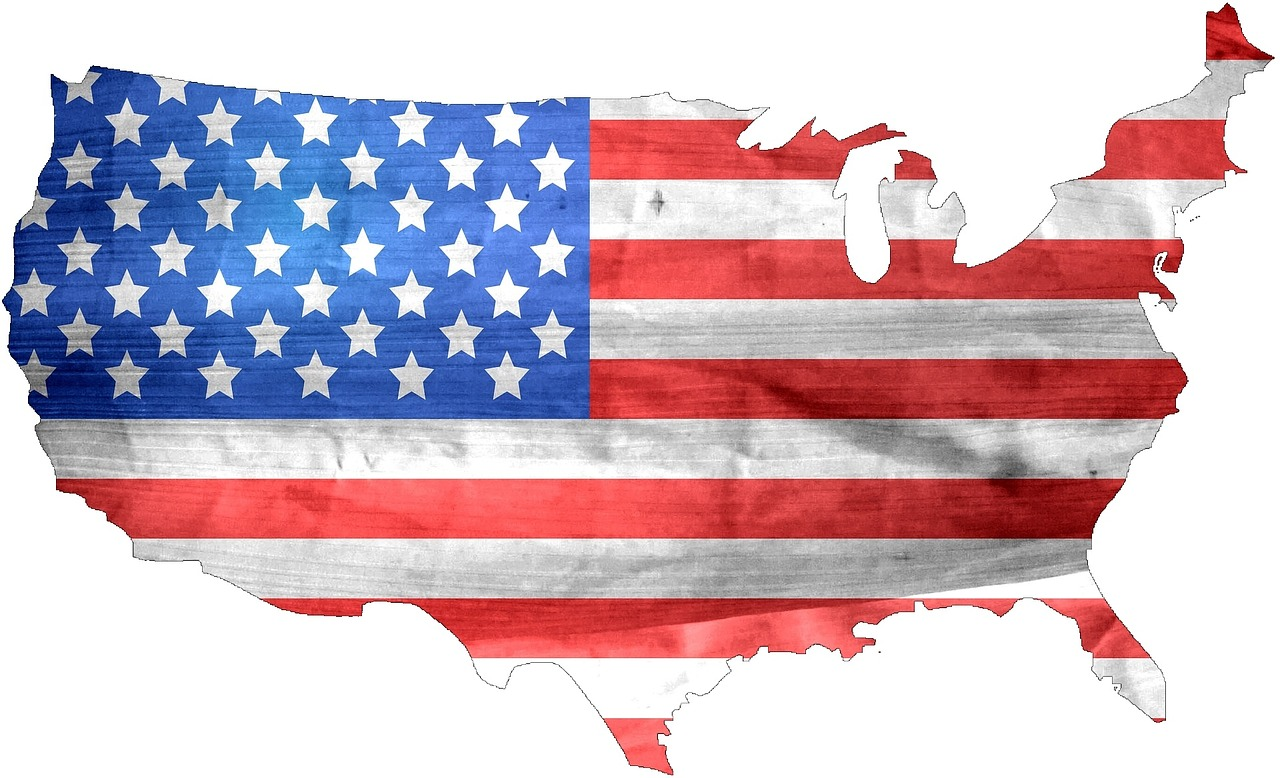

In [ ]:
from IPython.display import Image
Image("usa_map.jpg",width = 120, height = 80 )

# 2.네이버 API 이용한 데이터 수집

참조 : https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8

## 가.네이버 뉴스 JSON 데이터 수집

json 데이터는 urlopen(request).read()는 바로 json.loads() 할 수 있고 이것은 바로 pd.DataFrame으로 정리 가능

In [76]:
from urllib.parse import quote
from urllib.request import Request, urlopen
import json
import pandas as pd

##########
# 아래 코드는 네이버 API 아이디와 패스 넣기 위한 코드,
# with open(os.path.join(data_dir,'admin.json'),'r') as f:
#     s=f.read()
#     admin= json.loads(s)['naver_api']
# my_id = admin['id']
# my_pass = admin['pass']
#########

from drive.MyDrive.data.My_setting import my_id,my_pass

keyword = quote('오대산')
url = 'https://openapi.naver.com/v1/search/news?query=' + keyword+'&display=50'
request = Request(url)
request.add_header('X-Naver-Client-Id', my_id)
request.add_header('X-Naver-Client-Secret',my_pass)
response = urlopen(request).read()
response
items = json.loads(response)['items']    #items json 형태중 items 태그 딕셔너리로 리스트형식으로  key 와 값을 반환
print(items)
df = pd.DataFrame(items)   ##df정의요
col=[0,1,3,4]
top_news = df.iloc[:,col]
top_news


[{'title': '&apos;힘차게 신나게 멋있게&apos; 염불만일 대장정 재개', 'originallink': 'http://www.beopbo.com/news/articleView.html?idxno=317213', 'link': 'http://www.beopbo.com/news/articleView.html?idxno=317213', 'description': '1998년 8월5일 고성 건봉사를 시작으로 해마다 천봉산 대원사, 설악산 백담사, 달마산 미황사, 팔공산 은해사, 한라산 법화사, 덕숭산 수덕사, 토함산 불국사, <b>오대산</b> 월정사 등 전국의 염불성지에서 &apos;나무아미타불... ', 'pubDate': 'Fri, 21 Jul 2023 20:48:00 +0900'}, {'title': '월정사 명상 학술 세미나...&quot;<b>오대산</b>을 세계적 명상-순례 성지로&quot;', 'originallink': 'https://news.bbsi.co.kr/news/articleView.html?idxno=3118872', 'link': 'https://news.bbsi.co.kr/news/articleView.html?idxno=3118872', 'description': '<b>오대산</b> 월정사는 21일, 한국명상심리상담학회와 함께 <b>오대산</b>을 세계적인 명상과 순례의 성지로 만들기 위한 &quot;성지 순례와 명상, 나를 찾아 떠나는 선재길&quot; 학술세미나를 개최했다. 대한불교조계종 제 4교구 본사 <b>오대산</b>... ', 'pubDate': 'Fri, 21 Jul 2023 19:14:00 +0900'}, {'title': '[최동열의 산썰(山說)] 12. 이름은 같지만, 같은 산이 아니랍니다-삼척 쉰움산...', 'originallink': 'http://www.kado.net/news/articleView.html?idxno=1194915', 'link': 'https://n.news.naver.co

,title,originallink,description,pubDate
0,&apos;힘차게 신나게 멋있게&apos; 염불만일 대장정 재개,http://www.beopbo.com/news/articleView.html?id...,"1998년 8월5일 고성 건봉사를 시작으로 해마다 천봉산 대원사, 설악산 백담사, ...","Fri, 21 Jul 2023 20:48:00 +0900"
1,월정사 명상 학술 세미나...&quot;<b>오대산</b>을 세계적 명상-순례 성지...,https://news.bbsi.co.kr/news/articleView.html?...,"<b>오대산</b> 월정사는 21일, 한국명상심리상담학회와 함께 <b>오대산</b>...","Fri, 21 Jul 2023 19:14:00 +0900"
2,"[최동열의 산썰(山說)] 12. 이름은 같지만, 같은 산이 아니랍니다-삼척 쉰움산...",http://www.kado.net/news/articleView.html?idxn...,"지난겨울 눈 내린 직후에 <b>오대산</b> 노인봉 정상에서 목도한 구름바다, 운해...","Fri, 21 Jul 2023 10:26:00 +0900"
3,&lt;13&gt;<b>오대산</b> 상원사 중창 권선문,http://www.ibulgyo.com/news/articleView.html?i...,그 단 하나의 예외에 해당하는 문헌이 바로 &lt;<b>오대산</b>상원사중창권선문...,"Fri, 21 Jul 2023 10:16:00 +0900"
4,&apos; 국가 공인&apos; 받은 깨끗한 공기…울진의 청정 계곡들,http://san.chosun.com/news/articleView.html?id...,<b>오대산</b> 청학동 소금강처럼 희고 깨끗한 암반 위로 맑은 계류가 감돌아 흐...,"Fri, 21 Jul 2023 07:46:00 +0900"
5,[명경대] 조선의 데이터센터,http://www.kado.net/news/articleView.html?idxn...,또한 광해군 때에는 춘추관과 함께 마니산·<b>오대산</b>·태백산·묘향산에 사고를...,"Fri, 21 Jul 2023 00:07:00 +0900"
6,[허경진의 초당문중과 강릉] 6. 시진핑 주석의 방한 연설과 코로나를 통해 되...,http://www.kado.net/news/articleView.html?idxn...,"강릉은 옛날의 명주인데, <b>오대산</b> 아래에 있다. 삼한에 12동천(洞天)이...","Fri, 21 Jul 2023 00:06:00 +0900"
7,DB가 강릉으로 전지훈련 간 이유는? “효율성”,,크로스컨트리는 약 10km 코스로 <b>오대산</b> 부근에서 진행된다. 19일에는...,"Thu, 20 Jul 2023 17:44:00 +0900"
8,"파주시, 20일 &apos;허준 선생 묘&apos; 주제 학술대회",http://www.tongilnews.com/news/articleView.htm...,"2) 8월 6일 25권으로 완성됐고, 1613년 11월에 개주갑인자로 인쇄, 간행됐...","Wed, 19 Jul 2023 16:58:00 +0900"
9,지리산 계곡서 산삼 10뿌리 발견..감정가 1억 5천만 원,http://www.ikbc.co.kr/article/view/kbc20230719...,김 교수는 지난달에도 강원 홍천 <b>오대산</b>에서 수령 50년 이상으로 추정되...,"Wed, 19 Jul 2023 16:33:00 +0900"


In [23]:
top_news['description'][0]

'3명의 직원이 일본과 <b>싱가포르</b>에 살면서 한국 시간에 맞춰 일합니다. 정규 근무 시간은 오전 8~10시 사이에 시작해 점심시간 포함 9시간 일하면 됩니다. 과연 이 업체 직원들은 재택근무를 어떻게 하는지 궁금해 인사업무를... '

In [26]:
top_news['originallink'][11]

'http://www.newsis.com/view/?id=NISX20230721_0002385878&cID=13001&pID=13000'

###1)텍스트 전처리 :
#### description을 모두 합쳐 말뭉치 만들고 콤마로 연결하고 한글이 아닌 것과 공백 없애기

In [86]:
# 텍스트 전처리 : description을 모두 합친 말뭉치 만들고 콤마로 연결하고 한글이 아닌 것 과 공백 없애기
import re
corpus = df['description']    # DataFrame 기능 :요약 컬럼을 하나로 합치기
corpus
con_text = ",".join(corpus)
con_text
print(len(con_text))
text = re.sub('[^가-힣|^ |]', '',con_text)
text

6824


'년 월일 고성 건봉사를 시작으로 해마다 천봉산 대원사 설악산 백담사 달마산 미황사 팔공산 은해사 한라산 법화사 덕숭산 수덕사 토함산 불국사 오대산 월정사 등 전국의 염불성지에서 나무아미타불 오대산 월정사는 일 한국명상심리상담학회와 함께 오대산을 세계적인 명상과 순례의 성지로 만들기 위한 성지 순례와 명상 나를 찾아 떠나는 선재길 학술세미나를 개최했다 대한불교조계종 제 교구 본사 오대산 지난겨울 눈 내린 직후에 오대산 노인봉 정상에서 목도한 구름바다 운해의 장관도 오래도록 여운이 가시지 않는 감동의 결정판이었다 매일 올라도 싫증나지 않는 산 그것은 다른 산이 거기서 기다리고 있기 때문이다 그 단 하나의 예외에 해당하는 문헌이 바로 오대산상원사중창권선문   이다 그리고 표지 한 면을 넘기면 첫 행에 오대산상원사중창권선문이라고 적어 놓아서 오대산 청학동 소금강처럼 희고 깨끗한 암반 위로 맑은 계류가 감돌아 흐르는가 하면 어떤 곳은 큼직한 호박만 한 바윗덩이들이 널렸고 한편은 모래톱을 이룬 평평한 곳도 나타난다 구수곡자연휴양림에 자리 잡고 계곡 또한 광해군 때에는 춘추관과 함께 마니산오대산태백산묘향산에 사고를 마련해 나누어 보관했다 그중 오대산 사고본은 일제에 의해 반출된 뒤 상당 부분 소실됐으나 각계의 노력으로 년과 년 환수돼 현재는 강릉은 옛날의 명주인데 오대산 아래에 있다 삼한에 동천이 있는데 강릉이 제동천이라는 설명을 덧붙였다 동천은 신선세계같이 아름다운 곳이니 전쟁 중에도 고향을 잊지 못해 중국에 자랑하는 허균의 강릉 크로스컨트리는 약  코스로 오대산 부근에서 진행된다 일에는 이선 알바노가 선수단 중 가장 먼저 결승점을 통과했다고 한다 그동안 순발력 훈련과 웨이트 트레이닝을 중점적으로 했다 하지만 지구력 훈련을  월 일 권으로 완성됐고 년 월에 개주갑인자로 인쇄 간행됐다 년 월 일 유네스코에서 초판 완질 본오대산사고본 적성산사고본을 세계기록유산으로 등재했고 년 월 일 국보 호로 지정됐다김 교수는 지난달에도 강원 홍천 오대산에서 수령 년 이상으로 추정되는 길

### 2)한글 형태소 분석기 설치

In [8]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.1 MB/s eta 0:00:00


###3)분석시 필요없는 불용어 제거하기

In [78]:
#korea_stopwords.txt를 다운로드해서 로칼pd에 저장
stopwords =pd.read_csv("https://raw.githubusercontent.com/hwanheo97/Dataset/master/korean_stopwords.txt").values.tolist()
# 다운로드 자료 구글드라이브에 백업
# df.to_csv(os.path.join(data_dir, 'korean_stopwords.txt'), index=False)
# df[:10]
# stopword =df[:]
# stopwords[:10]

# 형태 조정, 특별한 용어 추가, 불용어 추가하여 분석할 망뭉치에서 제거하기
stopwords=[x[0]  for x in stopwords]
stopwords[:10]
for word in stopwords :
  if word =='한국':
    print('yes')
#stopwords 추가 , 제주 호텔 리뷰를 자료로 하니 제주, 제주도 호텔 등의 단어가 많을 수 밖에 없어 제저처리
keyword_stopwords = ['오대산', '관광']
for word in keyword_stopwords:
    stopwords.append(word)
print(stopwords)

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어

#### 4) 형태소분석기 이용하여 명사, 한글자 이상, 불용어 처리하고 워드 빈도수 이용 wordcloud 그리기

(-0.5, 1199.5, 1096.5, -0.5)

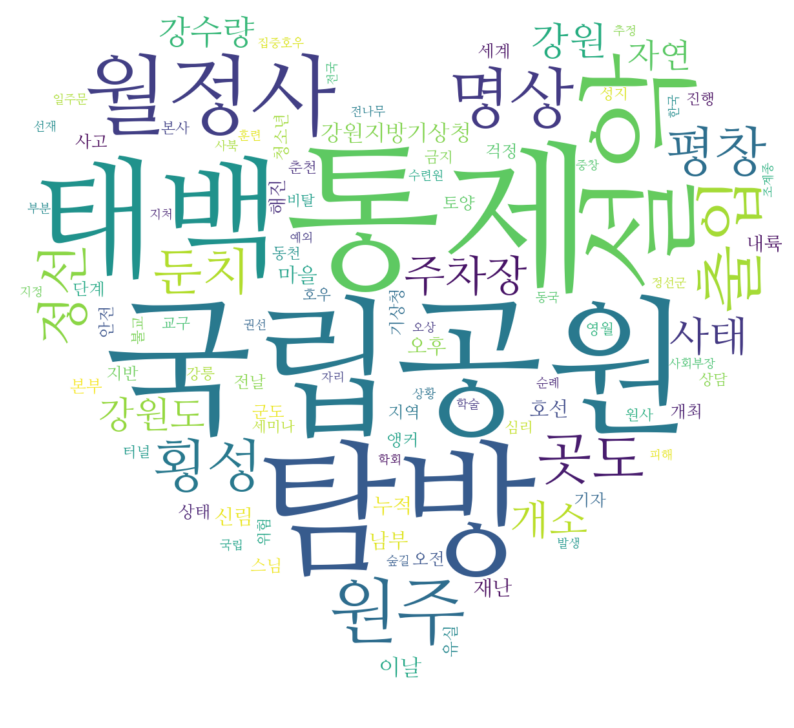

In [84]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text

#분석시 필요앖는 단어 없애기
para = re.sub('[싱가포르|시대|산업]', '',para)

# 2. 한글 형태소 분석하기, 명사만 추출
tag = Komoran()
nouns = tag.nouns(para)
nouns = [n for n in nouns if len(n) > 1]   #한글자 이상되는 명사 사용
type(nouns)
nouns = [x for x in nouns if x not in stopwords] # 불용어 제거

# 3. 단어 숫자 세기
count = Counter(nouns)
tags = count.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


### 워드 카운터 & 빈도수 시각화

In [80]:
# 워드카운트
from collections import Counter
nouns = [n for n in nouns if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count = Counter(nouns)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top1 = count.most_common(10)
print(top1)

[('통제', 32), ('국립공원', 29), ('탐방', 29), ('태백', 23), ('설악', 21), ('월정사', 17), ('원주', 17), ('출입', 16), ('명상', 14), ('횡성', 14)]


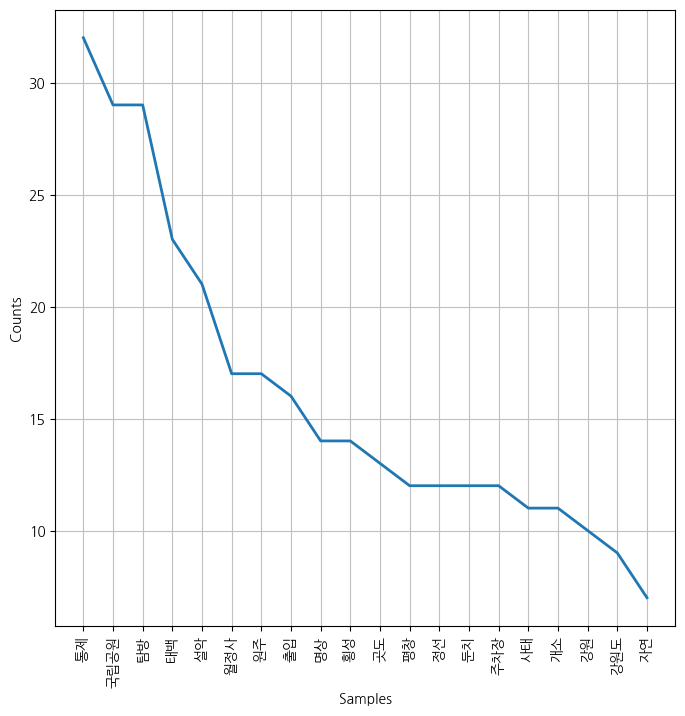

<Axes: xlabel='Samples', ylabel='Counts'>

In [81]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

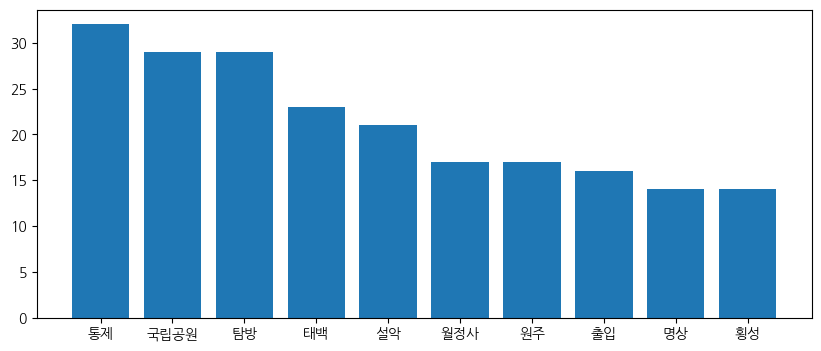

In [82]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

## 나. 네이버 백과사전 XML 데이터수집

In [87]:
import os
import sys
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import re

keyword = urllib.parse.quote("4차산업혁명")
#url = "https://openapi.naver.com/v1/search/blog?query=" + keyword # json 결과
url = "https://openapi.naver.com/v1/search/encyc.xml?query=" + keyword +'&display=10'  # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",my_id)
request.add_header("X-Naver-Client-Secret",my_pass)
response = urllib.request.urlopen(request)
soup = BeautifulSoup(response,'html.parser')  # xml 문서도 html과 동일하게 html.parser 이용
# print(soup.prettify())
data = soup.find_all('item')  # item tag를 찾아서 리스트 형태로 제공
print(data[:1])
rows = []
for item in data:
    title = item.find("title").get_text()
    link = item.find("link")   #.get_text()
    description= item.find("description").get_text()

    title = re.sub('[^가-힣,.]', ' ',title)     #title을 정리하기  ^가-힣  까지 한글이 아닌 것으 공백으로 대체 하는 함수 sub()
    link= link #re.sub('[^가-힣,.]', ' ',link)
    description = re.sub('[^가-힣,.]', ' ',description)
    rows.append({"제목": title,
                 "요약": description,
                 "링크": link})

df = pd.DataFrame(rows)
df

# col=[0,1,2]
# top_news = df.iloc[:,col]
# top_news

[<item><title>&lt;b&gt;4차 산업혁명&lt;/b&gt;</title><link/>https://terms.naver.com/entry.naver?docId=3377297&amp;cid=43667&amp;categoryId=43667<description> 정보통신기술(ICT)의 융합으로 이뤄지는 차세대 &lt;b&gt;산업혁명&lt;/b&gt;으로, '초연결', '초지능', '초융합'으로 대표된다.  | 외국어 표기 | Fourth Industrial Revolution(영어) 四次 産業革命(한자) | 인공지능(AI)... </description><thumbnail>https://dthumb-phinf.pstatic.net/?src=%22https%3A%2F%2Fpost-phinf.pstatic.net%2FMjAxODExMjZfMTY2%2FMDAxNTQzMjMxNDEwOTIy.Q2g8_n17pSAX9V-e7P3PuA6zVpFWH2ku784fPII4V8cg.5k7jr11uhFcJaKDt8P8aDcPCwXguVk2scoR-llDn-okg.JPEG%2FIGbtZWQtKRdPklnriirA7uqd3yG4.jpg%3Ftype%3Dm4500_4500_fst%22&amp;type=w540#540x502#c502</thumbnail></item>]


/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,제목,요약,링크
0,차 산업혁명,"정보통신기술 의 융합으로 이뤄지는 차세대 산업혁명 으로, 초연...",[]
1,제 차 산업혁명,제 차 산업혁명 은 초연결 과 초지능 ...,[]
2,차 산업혁명 을 맞으며,"년을 시작하며 세계경제포럼 , 은...",[]
3,차 산업혁명,차 산업혁명 은 온라인 정보통신 기술이 오프라인 산업 현장...,[]
4,차 산업혁명,제 차 산업혁명 이라고 불렀다. 이전까지의 공장자동화는 미리 입력된 프로...,[]
5,차산업혁명,"차 산업혁명 은 물리세계, 디지털세계, 그리고 생물 세계가 융합되어,...",[]
6,차 산업혁명,"차 산업혁명 이란 인공지능기술 및 사물인터넷, 빅데이터 등 정보통신기술...",[]
7,차 산업혁명,차 산업혁명 은 차 산업혁명 을 다룬 책이다. 전 세계...,[]
8,차 산업혁명,,[]
9,차산업혁명,,[]


In [ ]:
df['요약'][0]

In [ ]:
df['링크'][1]

<link/>

In [88]:
# 텍스트 전처리
import re
paras = df['요약']    # 요약 컬럼을 하나로 합치기
paras
con_text = ",".join(paras)
con_text
print(len(con_text))
text2 = re.sub('[^가-힣|^ |^|]', '',con_text)
text2

1103


' 정보통신기술     의 융합으로 이뤄지는 차세대    산업혁명    으로  초연결   초지능   초융합 으로 대표된다    외국어 표기                                영어          한자    인공지능     제    차 산업혁명    은 초연결                   과 초지능                   을 특징으로 하기 때문에 기존    산업혁명    에 비해 더 넓은 범위       에 더 빠른 속도          로 크게 영향        을 끼친다  제    차         년을 시작하며 세계경제포럼                          은 향후 세계가 직면할 화두로      차 산업혁명     을 던졌다그 이후     차 산업혁명    이 유행어처럼 회자되었고 많은 논의가 이루어지기 시작했다더욱이     차 산업혁명    은 온라인 정보통신 기술이 오프라인    산업     현장에 적용되면서 일어난 혁신을 일컫는 말이다    가 오프라인 제조공장에 적용되면서 생산 영역에서 질적 상승이 일어났다생산 공정을 손쉽게 제    차 산업혁명    이라고 불렀다 이전까지의 공장자동화는 미리 입력된 프로그램에 따라 생산시설이 수동적으로 움직이는 것을 의미했다 하지만     차 산업혁명    에서 생산설비는 제품과 상황에 따라      차 산업혁명    은 물리세계 디지털세계 그리고 생물 세계가 융합되어 경제와 사회의 모든 영역에 영향을 미치게 하는 새로운    산업    시대를 말한다      차 산업혁명    은 물리세계 디지털세계 그리고 생물     차 산업혁명    이란 인공지능기술 및 사물인터넷 빅데이터 등 정보통신기술     과의 융합을 통해 생산성이 급격히 향상되고 제품과 서비스가 지능화되면서 경제 사회 전반에 혁신적인 변화가 나타나는      차 산업혁명     은     차 산업혁명    을 다룬 책이다 전 세계가     차 산업혁명     준비에 여념이 없다  지능 과  연결 을 키워드로

(-0.5, 1199.5, 1096.5, -0.5)

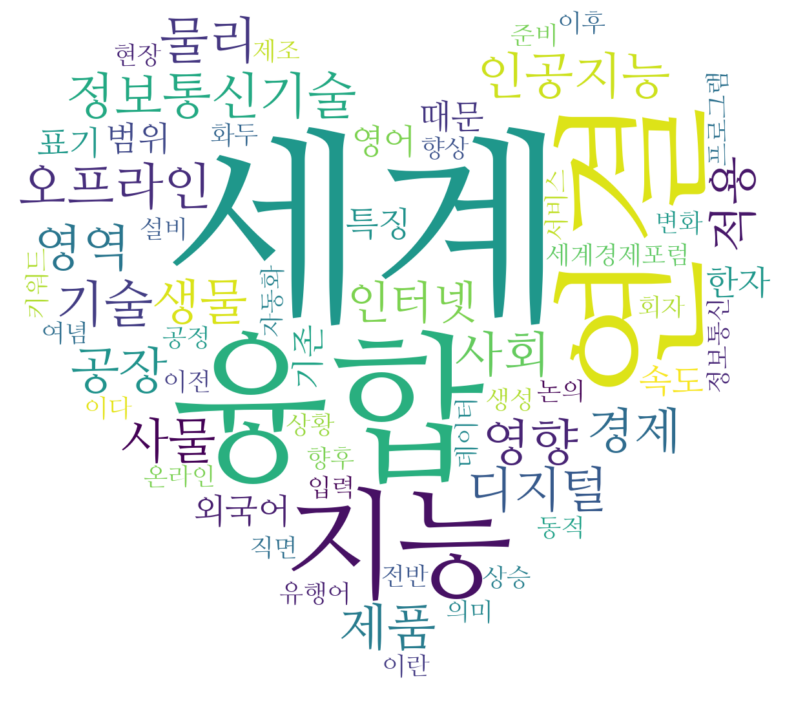

In [94]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text2

para = re.sub('[혁명|분석|시대|산업]', '',para)
# 2. 한글 형태소 분석하기
tag = Komoran()
nouns1 = tag.nouns(para)
nouns1 = [n for n in nouns1 if len(n) > 1]   #한글자 이상되는 명사 사용
nouns1 = [x for x in nouns1 if x not in stopwords] # 불용어 제거

# 3. 단어 숫자 세기
count = Counter(nouns1)
tags = count.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [95]:
# 워드카운트
from collections import Counter
nouns1 = [n for n in nouns1 if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count1 = Counter(nouns1)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top2 = count1.most_common(10)
print(top2)

[('세계', 7), ('융합', 4), ('연결', 4), ('지능', 4), ('정보통신기술', 2), ('인공지능', 2), ('영향', 2), ('기술', 2), ('오프라인', 2), ('적용', 2)]


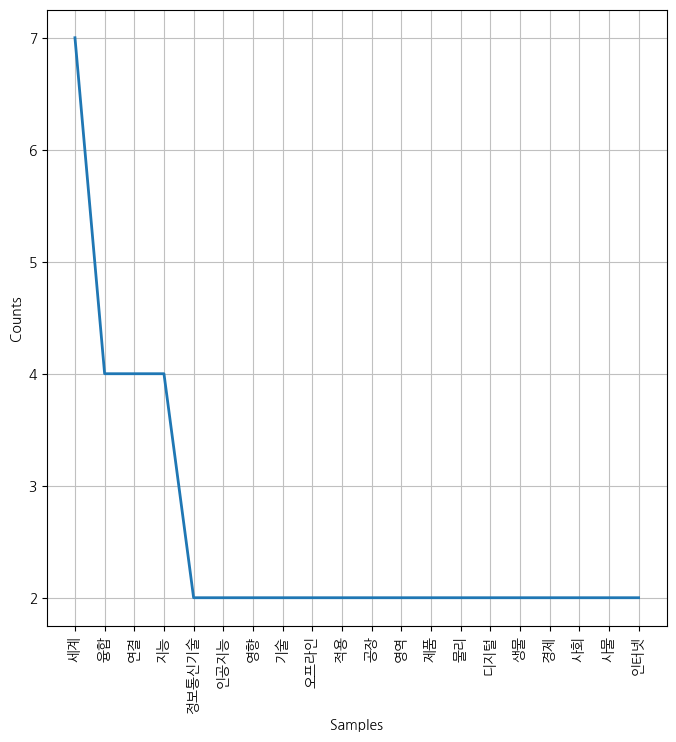

<Axes: xlabel='Samples', ylabel='Counts'>

In [96]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns1)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

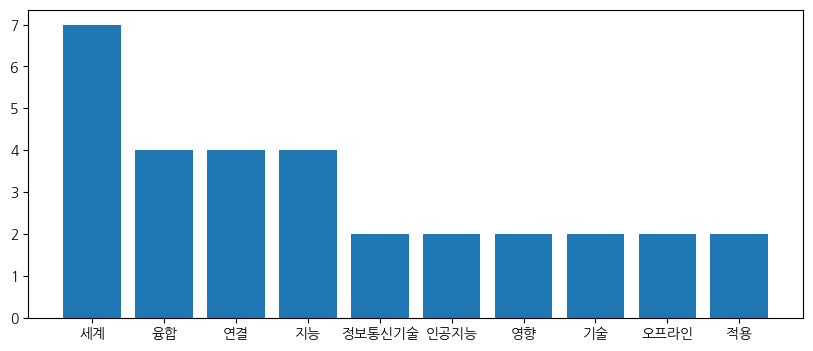

In [104]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

## 다. 네이버 블로그 JSON 데이터수집

In [92]:
# 참고 코드 : 네이버 영화 조회
import re
import pandas as pd
import json
import urllib.request


# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request

from drive.MyDrive.data.My_setting import my_id,my_pass
encText = urllib.parse.quote("빅데이터")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",my_id)
request.add_header("X-Naver-Client-Secret",my_pass)
response = urllib.request.urlopen(request)


response_body = response.read()
info = response_body.decode('utf-8')
data = json.loads(info)['items']
print(data)
df = pd.DataFrame(data)
col=[0,5,6,4,7]
# df.iloc[:,col]
df

# rescode = response.getcode()
# if(rescode==200):
#     response_body = response.read()
#     print(response_body.decode('utf-8'))
# else:
#     print("Error Code:" + rescode)





[{'title': '[도서] 상위 1%의 커리어 비밀노트 특허 <b>빅데이터</b>_송완감 외', 'link': 'https://blog.naver.com/deviliana/223153557597', 'description': '데이터 뽑기 바쁜데 이건 왜 들어야 하는거지? 하는 생각을 수업을 들을때 하고 있었던 것 같기도 하다.... 1부는 특허와 <b>빅데이터</b>의 개요며 이들을 분석하는 게 왜 필요한지의 당위성을 설명하는 파트이고, 2... ', 'bloggername': 'Totipotency.', 'bloggerlink': 'blog.naver.com/deviliana', 'postdate': '20230712'}, {'title': '<b>빅데이터</b>전문가 자격증 합격후기 알려드려요', 'link': 'https://blog.naver.com/ejlove0002/223147638970', 'description': '처음에 이 분야에서 꼭 알아야 하는 데이터와 정보, 데이터베이스에 대해 배워요. 그리고 <b>빅데이터</b>에 대한 이해를 진행합니다. 교수님께서 쉽게 풀어서 설명해 주시니까 처음이어도 어렵지 않았어요. 그리고... ', 'bloggername': 'daily~', 'bloggerlink': 'blog.naver.com/ejlove0002', 'postdate': '20230705'}, {'title': '<b>빅데이터</b>분석기사 필기 및 실기 합격 후기 (2023년 1회차... ', 'link': 'https://blog.naver.com/haen0202/223154726628', 'description': '실기 공부 안한사람들의 치트키 세가지 꼭 기억하기 이거 진짜 꿀팁 <b>빅데이터</b>분석기사 필기 책/실기 책 추천 내가 구매한 2권의 교재들. 필기 교재 이전에 ADsP 공부할 때 썼던 데이터에듀 책으로 골랐다. 사실... ', 'bloggername': 'Always keep learning', 'bloggerl

,title,link,description,bloggername,bloggerlink,postdate
0,[도서] 상위 1%의 커리어 비밀노트 특허 <b>빅데이터</b>_송완감 외,https://blog.naver.com/deviliana/223153557597,데이터 뽑기 바쁜데 이건 왜 들어야 하는거지? 하는 생각을 수업을 들을때 하고 있었...,Totipotency.,blog.naver.com/deviliana,20230712
1,<b>빅데이터</b>전문가 자격증 합격후기 알려드려요,https://blog.naver.com/ejlove0002/223147638970,"처음에 이 분야에서 꼭 알아야 하는 데이터와 정보, 데이터베이스에 대해 배워요. 그...",daily~,blog.naver.com/ejlove0002,20230705
2,<b>빅데이터</b>분석기사 필기 및 실기 합격 후기 (2023년 1회차...,https://blog.naver.com/haen0202/223154726628,실기 공부 안한사람들의 치트키 세가지 꼭 기억하기 이거 진짜 꿀팁 <b>빅데이터</...,Always keep learning,blog.naver.com/haen0202,20230713
3,대구컴퓨터학원 <b>빅데이터</b> 분석 과정 꼼꼼한 학습,https://blog.naver.com/rame83/222961743303,"시험 과목은 <b>빅데이터</b> 분석 기획(<b>빅데이터</b>의 이해, 데이터 ...",임엄마의 얼렁뚱땅 주부놀이,blog.naver.com/rame83,20221221
4,<b>빅데이터</b>와 클라우드의 날개를 달다 : 머신비전,https://blog.naver.com/with_msip/223151925611,그런데 이 '국가 바이오 <b>빅데이터</b> 구축 사업' 덕분에 연구자들은 국외의...,과학기술정보통신부 블로그,blog.naver.com/with_msip,20230711
5,부산코딩학원 웹 앱개발자 <b>빅데이터</b> 국비지원(서면역),https://blog.naver.com/qislvie/223141972765,부산<b>빅데이터</b>학원 데이터분석 기술 배우기 부산<b>빅데이터</b>학원에서...,난 할 수 있다,blog.naver.com/qislvie,20230629
6,국취제 <b>빅데이터</b>전문가양성과정 아이티윌 강남 유연수 강사님...,https://blog.naver.com/dinnernin/223138604774,sqlp까지 공부하는 동기들도 있다 정말 어렵지만 그만큼 가치 있는 시험이니까 다음...,dinnernin’ playlist,blog.naver.com/dinnernin,20230626
7,개판 일보직전 <b>빅데이터</b> 업체의 거짓말? 부동산 정보.,https://blog.naver.com/goldq2/223145485690,"최근에 부동산 정보에 관심이 많아서, 이런 저런 <b>빅데이터</b> 업체의 부동산...",Atlas&apos; fishing n tour,blog.naver.com/goldq2,20230703
8,<b>빅데이터</b> 분석기사 노베이스 비전공자 필기/실기 초수합격...,https://blog.naver.com/sswan85/223162645031,나는 <b>빅데이터</b> 분석기사를 7월 14일 부로 취득하였다. 필기는 제 5회...,종이배 Blog,blog.naver.com/sswan85,20230721
9,<b>빅데이터</b>분석기사 응시자격 확인 및 학습과정,https://blog.naver.com/mintsorbet07/223065739909,한국데이터산업진흥원이 시행하기로 2021년도에 첫 시험이 진행되었죠. IT업계 중에...,song&apos;s eyagi,blog.naver.com/mintsorbet07,20230406


In [98]:
# 텍스트 전처리
import re
paras = df['description']    # 요약 컬럼을 하나로 합치기
paras
con_text = ",".join(paras)
con_text
print(len(con_text))
text3 = re.sub('[^가-힣|^ |^|]', '',con_text)
text3

1280


'데이터 뽑기 바쁜데 이건 왜 들어야 하는거지 하는 생각을 수업을 들을때 하고 있었던 것 같기도 하다 부는 특허와 빅데이터의 개요며 이들을 분석하는 게 왜 필요한지의 당위성을 설명하는 파트이고  처음에 이 분야에서 꼭 알아야 하는 데이터와 정보 데이터베이스에 대해 배워요 그리고 빅데이터에 대한 이해를 진행합니다 교수님께서 쉽게 풀어서 설명해 주시니까 처음이어도 어렵지 않았어요 그리고 실기 공부 안한사람들의 치트키 세가지 꼭 기억하기 이거 진짜 꿀팁 빅데이터분석기사 필기 책실기 책 추천 내가 구매한 권의 교재들 필기 교재 이전에  공부할 때 썼던 데이터에듀 책으로 골랐다 사실 시험 과목은 빅데이터 분석 기획빅데이터의 이해 데이터 분석 계획 데이터 수집 및 저장 계획 빅데이터 탐색데이터 전처리 탐색 통계기법 이해 빅데이터 모델링분석 모형 설계 분석 기법 적용 그런데 이 국가 바이오 빅데이터 구축 사업 덕분에 연구자들은 국외의 데이터가 아닌 한국형 바이오 빅데이터를 원스톱으로 제공받을 수 있게 되었고 더욱 수월하게 관련 연구를 진행해  의료영상기기에 부산빅데이터학원 데이터분석 기술 배우기 부산빅데이터학원에서 데이터분석 기술을 배우기 위해서는 우선순위는 다양한 프로그래밍언어에 대한 학습이 있어야 합니다 보통 파이썬   명령어를 많이 까지 공부하는 동기들도 있다 정말 어렵지만 그만큼 가치 있는 시험이니까 다음으로는  데이터분석 준전문가 자격증도 트에 패스 저 중간에 빅데이터 분석기사도 있었는데 시간이 안맞아서 나는 최근에 부동산 정보에 관심이 많아서 이런 저런 빅데이터 업체의 부동산 정보를 보고 있는데요  정말 실망스럽고 정말 무섭네요 제가 주로 보는 것은 국토부 실거래가 일종의 로데이터 아실 리치고 나는 빅데이터 분석기사를 월 일 부로 취득하였다 필기는 제 회 시험에 합격하였고 실기는 제 회 그리고 데이터프레임에서 원하는 데이터를 추출하는 슬라이싱 능력이 제일 기본이다 결측치 이상치 한국데이터산업진흥원이 시행하기로 년도에 첫 시험이 진행되었죠 업계 중에서도 빅데이터 

(-0.5, 1199.5, 1096.5, -0.5)

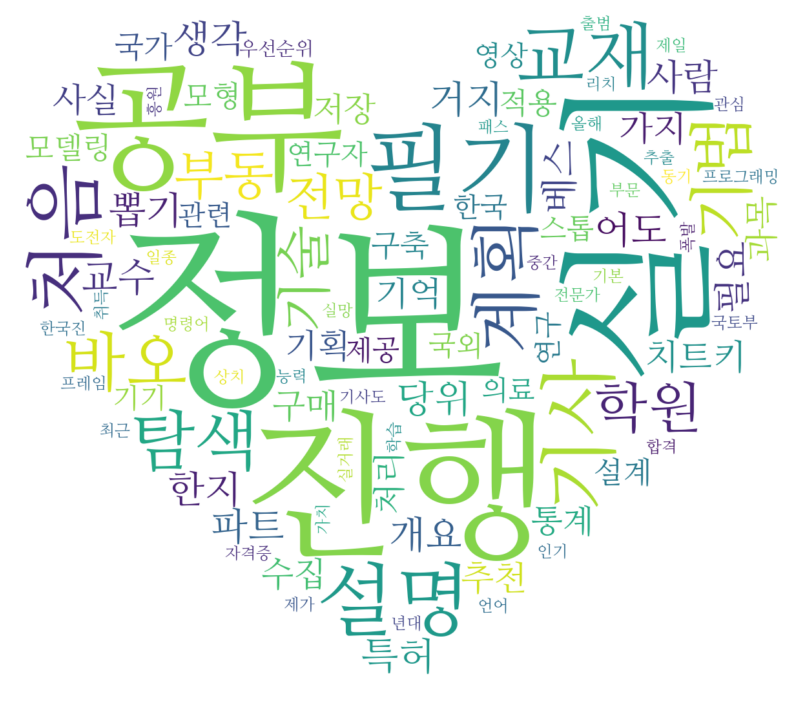

In [99]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text3

para = re.sub('[데이터|분석|시대|산업]', '',para)
# 2. 한글 형태소 분석하기
tag = Komoran()
nouns2 = tag.nouns(para)
nouns2 = [n for n in nouns2 if len(n) > 1]   #한글자 이상되는 명사 사용
nouns2 = [x for x in nouns2 if x not in stopwords] # 불용어 제거
# 3. 단어 숫자 세기
count2 = Counter(nouns2)
tags = count2.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [100]:
# 워드카운트
from collections import Counter
nouns2 = [n for n in nouns2 if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count2 = Counter(nouns2)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top3 = count2.most_common(10)
print(top3)

[('정보', 3), ('진행', 3), ('실기', 3), ('공부', 3), ('필기', 3), ('설명', 2), ('처음', 2), ('기사', 2), ('교재', 2), ('계획', 2)]


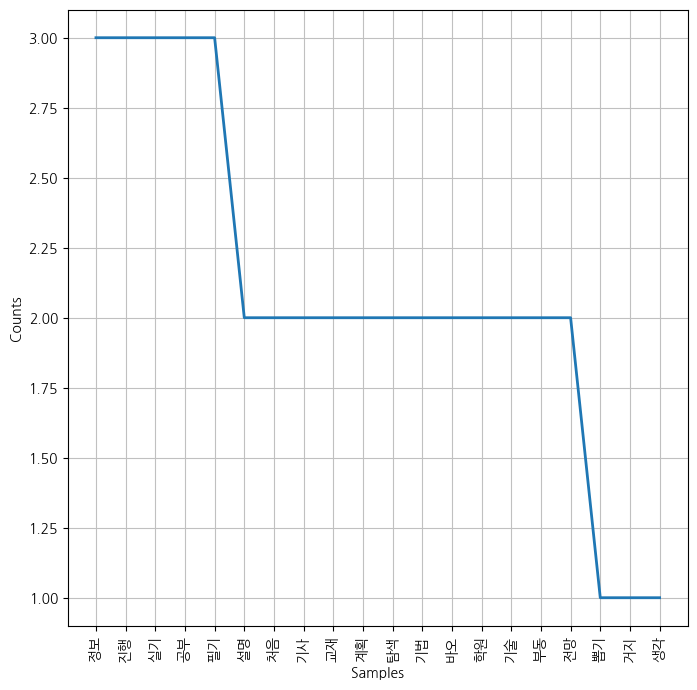

<Axes: xlabel='Samples', ylabel='Counts'>

In [101]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns2)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

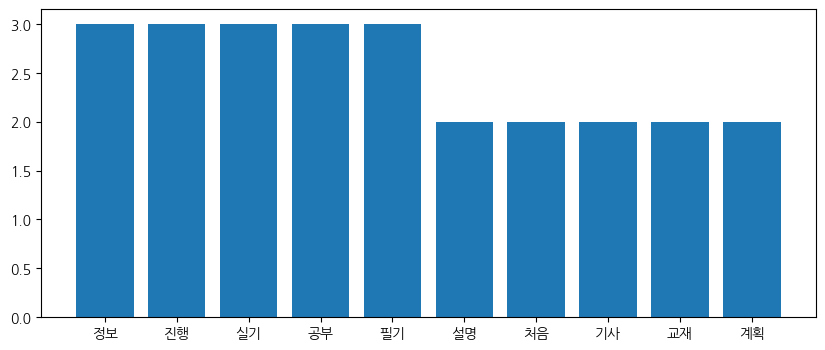

In [105]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

## 라. 네이버 블로그 XML 데이터수집

In [106]:
# 참고코드 : 강남역 맛집
import re
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup


from drive.MyDrive.data.My_setting import my_id,my_pass
encText = urllib.parse.quote("인공지능")
#url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",my_id)
request.add_header("X-Naver-Client-Secret",my_pass)
response = urllib.request.urlopen(request)

soup = BeautifulSoup(response,'xml') # 기존 코드 html.parser를 warning 제거를 위해 변경
data = soup.find_all('item')
print(data[:1])
rows = []
for item in data:
    title = item.find("title").get_text()
    #link = item.find("link").get_text()
    description= item.find("description").get_text()

    title = re.sub('[^가-힣,.]', ' ',title)     #title을 정리하기  ^가-힣  까지 한글이 아닌 것으 공백으로 대체 하는 함수 sub()
    # link=re.sub('[^가-힣,.]', ' ',link)
    description = re.sub('[^가-힣,.]', ' ',description)
    rows.append({"제목": title,
                 "요약": description})

df = pd.DataFrame(rows)
df

[<item><title>&lt;b&gt;인공지능&lt;/b&gt;에 기반한 신약개발 관련 기업들에 대한 생각</title><link>https://blog.naver.com/hardark/223155189732</link><description>이 글에서는 그동안 단편적으로 언급했던 &lt;b&gt;인공지능&lt;/b&gt;에 기반한 신약개발 바이오 기업들에 대한 생각을... 리커전 파마슈티컬스는 보도자료를 통해 엔비디아 클라우드 서비스를 사용해 &lt;b&gt;인공지능&lt;/b&gt; 기반 모델의... </description><bloggername>경제적 여유만큼 정신적 여유를</bloggername><bloggerlink>blog.naver.com/hardark</bloggerlink><postdate>20230713</postdate></item>]


,제목,요약
0,인공지능 에 기반한 신약개발 관련 기업들에 대한 생각,이 글에서는 그동안 단편적으로 언급했던 인공지능 에 기반한 신약개발 바이...
1,챗 와 이야기하다 인공지능 전문가가 알려주는 챗 로...,"오픈 는 년에 설립된 인공지능 연구 기업이었는데, 구글이나 ..."
2,아이큐코인 전망 및 시세와 인공지능 관련 특징,와 같은 인공지능 플랫폼은 최대한 많은 데이터 학습이 필요...
3,인공지능 이 인간의 일자리를 감소시킬 것인가,인공지능 이 인간의 일자리를 대체 이 질문은 최근에 사람들의 관심을 끌...
4,워시타워 오브제컬렉션 인공지능 세탁모드 작동 방법,워시타워 오브제컬렉션 인공지능 세탁모드 작동 방법입니다. 이 제품은...
5,스마트테크코리아에서 본 이스트소프트의 인공지능 기술들,이유는 이 이스트소프트 사장님이 뛰어난 인공지능 기술을 꾸준히 연구 개...
6,인공지능 기술력 엿볼 수 있는 . 에이닷 어플 챗 ...,필자가 초등학교를 다니던 시절에는 인공지능 라는 단어는 영화...
7,인공지능 교육 미래 경쟁력 키우기,"기본적으로 디지털 콘텐츠를 비롯하여 빅데이터, 인공지능 , 메타버스, 클..."
8,"구글 바드의 확장, 인공지능 으로 유튜브,지도,항공권을 한번에","구글 바드의 확장, 인공지능 으로 유튜브,지도,항공권을 한번에 안녕하세요..."
9,빙 챗 쓰려면 엣지 브라우저로 너만 몰라 인공지능 팁,너만 몰라 인공지능 팁 엔돌슨 . . . 빙 챗 ...


In [107]:
# 텍스트 전처리
import re
paras = df['요약']    # 요약 컬럼을 하나로 합치기
paras
con_text = ",".join(paras)
con_text
print(len(con_text))
text4 = re.sub('[^가-힣|^ |^|]', '',con_text)
text4

1312


'이 글에서는 그동안 단편적으로 언급했던    인공지능    에 기반한 신약개발 바이오 기업들에 대한 생각을 리커전 파마슈티컬스는 보도자료를 통해 엔비디아 클라우드 서비스를 사용해    인공지능     기반 모델의 오픈   는     년에 설립된    인공지능     연구 기업이었는데 구글이나 페이스북 같은 거대한 테크 기업이 재미있었던 것은 챗   로 단편소설 쓰기에서 간단한 주인공을 설명하면서 단편소설을 써달라고 하자 제법        와 같은    인공지능     플랫폼은 최대한 많은 데이터 학습이 필요하고 데이터를 제공하는 프로젝트인 그리고    인공지능    에 블록체인 비즈니스까지 결합됐다는 점에서 아이큐코인 전망은    인공지능    의 재료    인공지능    이 인간의 일자리를 대체  이 질문은 최근에 사람들의 관심을 끌며 치열한 논쟁을 일으키고 감성지능 수준이 부족하다고 주장합니다 일부 낙관론자들은   가 특정 역할에서 인간의 능력을   워시타워 오브제컬렉션    인공지능     세탁모드 작동 방법입니다 이 제품은 올해  월에 결제해서  월에 신축 아파트인 우리 집에 설치했답니다 우리집 다용도실에 설치한 모습입니다    인공지능     세탁모드는 이유는 이 이스트소프트 사장님이 뛰어난    인공지능     기술을 꾸준히 연구 개발하고 있었더라고요 제가 실제로 셔터스톡은    인공지능    이 학습한 데이터 또는 원재료의 사진을 촬영한 원저작권자에게   가 만든 필자가 초등학교를 다니던 시절에는       인공지능     라는 단어는    영화나 과학 책 같은 곳에서만 대표적인 예로 자율주행 차량    인공지능     개인 비서 프로그램 시리 구글 어시스턴트 알렉사 코타나  기본적으로 디지털 콘텐츠를 비롯하여 빅데이터    인공지능     메타버스 클라우드 지능형 로봇 등 여러 과정으로 세분화 된 커리큘럼을 진행하고 있는데요 파이썬을 활용한 딥러닝 텐서 플로우 활용 인프라 구글 바드의 확장    인공지능    으로 유튜브지도항공권을 한번에 안녕

(-0.5, 1199.5, 1096.5, -0.5)

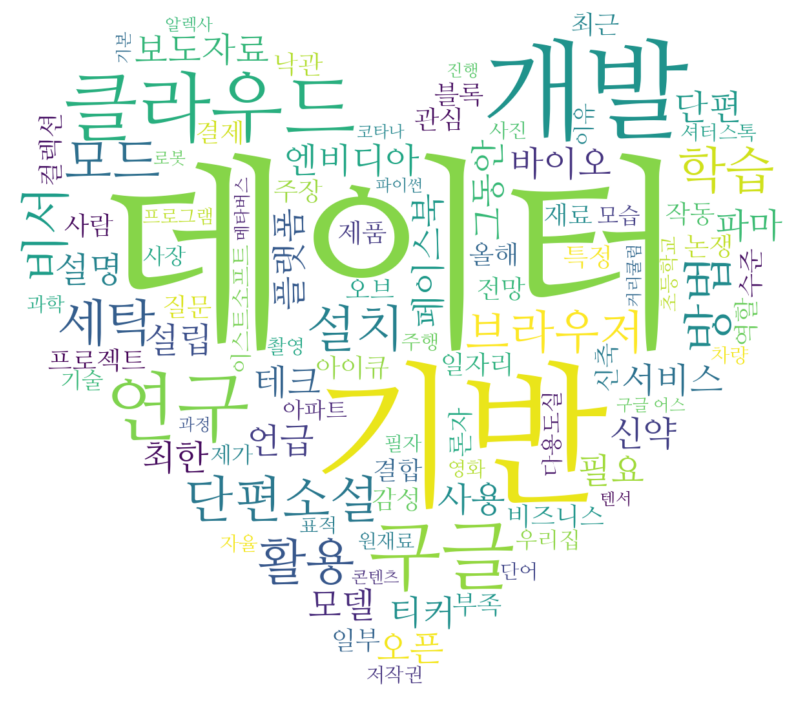

In [109]:
from konlpy.tag import Komoran
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. 분석대상 텍스트 파일 정리 및 지정
para=text4

para = re.sub('[인공지능|분석|시대|산업|생각]', '',para)
# 2. 한글 형태소 분석하기
tag = Komoran()
nouns3 = tag.nouns(para)
nouns3 = [n for n in nouns3 if len(n) > 1]   #한글자 이상되는 명사 사용
nouns3 = [x for x in nouns3 if x not in stopwords] # 불용어 제거
# 3. 단어 숫자 세기
count = Counter(nouns3)
tags = count.most_common(100)

# 4. 이미지 마스킹 처리 위한 np.array로 변환
icon = Image.open('heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

# 5. 워드 클라우드 이미지 생성 데이터 시각화 및 출력 저장하기
my_path='/content/NanumMyeongjo.ttf'

# word cloud 객체 구성
wordcloud = WordCloud(font_path=my_path,
                      background_color='white',
                      width=1200,
                      height=800,
                      mask=mask).generate_from_frequencies(dict(tags))

# 화면에 출력 및 저장하기
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [111]:
# 워드카운트
from collections import Counter
nouns3 = [n for n in nouns3 if len(n) > 1] # 글자 하나짜리 제거

# 단어 숫자 세기
count3 = Counter(nouns3)

# count.elements ,count 객체의 빈도수 높은 단어 10개 보기
top4 = count3.most_common(10)
print(top4)

[('데이터', 4), ('기반', 2), ('개발', 2), ('클라우드', 2), ('연구', 2), ('구글', 2), ('단편소설', 2), ('학습', 2), ('세탁', 2), ('모드', 2)]


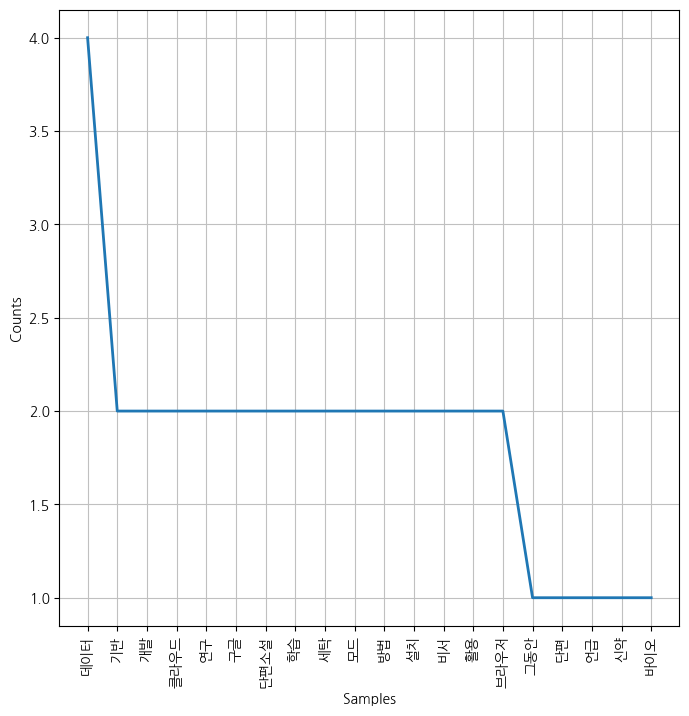

<Axes: xlabel='Samples', ylabel='Counts'>

In [112]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns3)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(8,8))
pos.plot(20)

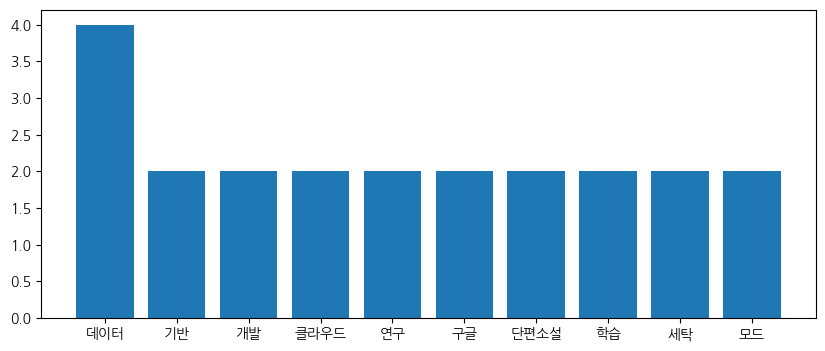

In [113]:
top_10 = count.most_common(10)
plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10, 4))
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

# 3.공공데이터 포털 API 이용한 데이터 수집

공공데이터포털 참조 : https://www.data.go.kr/

코로나 19감염현황 자료 : https://www.data.go.kr/data/15098780/openapi.do

requests.get(url) 데이터는 BS으로 파싱하여 soup.find_all()로 태그를 찾아들어가서 for문으로 정리한다

In [ ]:
# 보건복지부 코로나 19 감염현황 :
# 영상 촬영시 검색 가능항목이 변경되어서 코드가 수정되었습니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup
my_key = '7qt0z4%2FdM2V7wmp35j31S4ong1gY4FFNRLTW0ygAlDFXcTwehDpF4Vco5bd%2BI8TDJvnlWUlwUuDCXlExobA0QQ%3D%3D'
#my_key='QQbPywnt6MGpqLw8dt1NMRC8kBMnWy%2Bd%2FFDsw4AzSRnuRwzKzg%2BNTTsgP9OERV3wVFiepoiX%2B1T1c4ckezqn5w%3D%3D'
params = '&pageNo=1&numOfRows=10&startCreateDt=20230101&endCreateDt=20230321'
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson?serviceKey='+my_key+params
res = requests.get(url)
soup = BeautifulSoup(res.content,'html.parser')  # xml 문서도 html과 동일하게 html.parser 이용

data = soup.find_all('item')  # item tag를 찾아서 리스트 형태로 제공
# print(data)
#print(soup.prettify()[:1000])
rows = []
for i, item in enumerate(data):
    n_stateDt = item.find("statedt").get_text()
    n_decideCnt = item.find("decidecnt").get_text()
    # n_clearCnt= item.find("clearcnt").get_text()
    n_deathCnt = item.find("deathcnt").get_text()
    # n_accexamCnt = item.find("accexamcnt").get_text()
    # n_accDefRate = item.find("accdefrate").get_text()
    if i>5:
      break
    if i == 0:
      new_decideCnt = '-'
    else :
      new_decidCnt = 0
      new_decideCnt = int(new_decideCnt)-int(n_decideCnt)
    rows.append({"기준일": n_stateDt,
                 "확진자수": n_decideCnt,
                #  "추가 확진자수": new_decideCnt,
                #  "격리해제수": n_clearCnt,
                #  "검사진행수": n_examCnt,
                 "사망자수": n_deathCnt,
                #  "누적의심검사수": n_accexamCnt,
                #  "누적확진률" : n_accDefRate
                 })

    new_decideCnt = n_decideCnt

# convert XML data to pandas DataFrame
df = pd.DataFrame(rows)
df.head()
# print(url)

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,기준일,확진자수,사망자수
0,20230321,30714691,34178
1,20230320,30702678,34171
2,20230318,30689952,34159
3,20230317,30680964,34155
4,20230315,30661967,34131


4.트위터 API를 이용한 데이터 수집

tweepy 라이브러리 https://docs.tweepy.org/en/stable/auth_tutorial.html

트위터 개발자 참조  https://developer.twitter.com/en

토큰발급 : https://apps.twitter.com 접속 앱개발자 등록


In [ ]:
# import json
# import tweepy
# import dataset
# from drive.MyDrive.data.My_setting import *

# API_KEY=' '
# API_SECRET = ''
# TOKEN_KEY=''
# TOKEN_SECRET=''
# auth=tweepy.OAuthHandler(API_KEY,API_SECRET)
# auth.set_access_token(TOKEN_KEY,TOKEN_SECRET)

# api=tweepy.API(auth)
# query='빅데이터'
# cursor=tweepy.Cursor(api.search, q=query,lang='KO')

# #아이템 갯수기준 출력
# for item in cursor.items[0]:
#   print(item.text)

#   #페이지 기준 출력
# for page in cursor.pages(2):
#   for item in page:
#     print(item.text)


